In [188]:
%pylab inline
import scipy.stats as st

Populating the interactive namespace from numpy and matplotlib


# Conteo de secciones delgadas (Componente estadístico)

El conteo de secciones delgadas que estamos realizando se utiliza para **estimar** el porcentaje de un componente en una muestra. En este momento estamos utilizando un conteo de n=300 con una grilla equiespaciada siguiendo la metodología de clasificación de Folk.


# Estadistica

Al día de hoy estamos realizando la estimación de distintos componentes (e.g Cuarzo monocristalino, feldespatos, liticos, porosidad, etc.) para simplificarlos los llamaremos componentes A,B,C,....,Z.

En estricto sentido estadístico cada componente (A,B,..,Z) es una observación de un experimento. En nuestro caso estamos realizando 300 observaciones de la cual obtenemos en cada una de ellas un componente.


Para simplificar podemos decir que en un conteo de seccion delgada estamos contando todo lo que es un componente A contra todo lo que no es un componente A. Estos nos permite simplificar el problema a un modelo Bivariante. Por ejemplo si obtenemos el siguiente resultado de 10 observaciones:

**ABCDEFGHAB**

Podemos decir que tuvimos 2 observaciones de A y 8 observaciones A complemento (Todo lo que no es A).

Esta simplificación nos permite utilizar un estimador estadístico P para la proporción real de componentes A en una muestra. Asimismo podemos identificar el margen de error del estadístico y plantear el intervalo de confianza de cada medición.

En este caso el error asociado a cada medición está dado por la fórmula:


$$ \LARGE E=Z_{\frac{\alpha}{2}}\sqrt{\frac{PQ}{n}} $$

Con:
$$ \LARGE Q=1-P $$

Y 

Z siendo una distribución normal con parametro $$\frac{\alpha}{2}$$


Debido a que P (Estimador) y Q (complemento de P) maximizan el error cuando son iguales a 0.5 lo tomaremos como nuestro caso base. Sin embargo si asumiéramos que estamos contando la porosidad de una roca claramente este valor sería poco problable.

En la ecuación anterior podemos controlar 2 elementos. El nivel de confianza y el numero de conteos n.
En este caso el nivel de confianza aumenta cuando alpha es mas pequeño. Este nivel de confianza indica que tan seguros queremos estar de una afirmación, por ejemplo si queremos estar 90% seguros de una afirmación nuestro alpha debe ser:
$$\alpha=0.1$$

A continuación podemos ver como varía el error asociado a cada medición si queremos estar tener una confianza del 90% al aumentar el número de mediciones.

In [195]:
t1 = np.arange(1, 500.0, 1)

In [196]:
def error(alpha,p,n):
    return st.norm.ppf(1-(alpha/2))*sqrt(p*(1-p)/n)

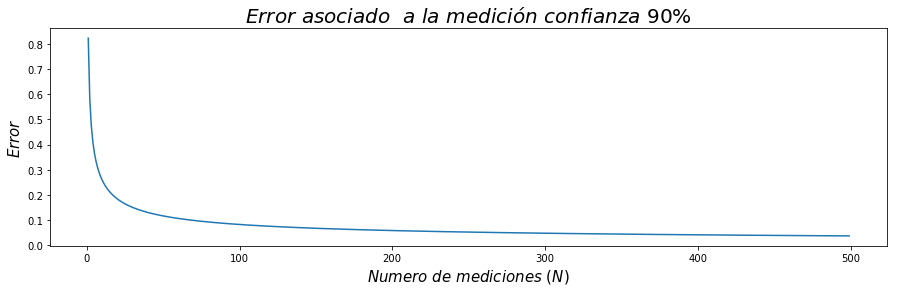

In [197]:
figure(figsize=(15,4))
plt.title("$Error\ asociado\  \ a\ la \ medición\ confianza\ 90 \%$",fontsize=20)
plt.xlabel('$Numero\ de\ mediciones\ (N)$', fontsize=15)
plt.ylabel('$Error\ $', fontsize=15)
plt.plot(t1, error(0.1,0.5,t1))

Esto confirma la intuición: a mayor numero de mediciones menor es el error asociado. Miremos los datos de como cambia el error dependiendo de el número de conteos.

In [203]:
def imprimir(alpha,p,n):
    print ("Con un alpha de "+str(alpha)+", un p de "+str(p)+" y un n="+str(n)+" el error asociado es: "+str(round(error(alpha,p,n),3)))
for i in range (100,1000,100):
    imprimir(0.1,0.5,i)

Con un alpha de 0.1, un p de 0.5 y un n=100 el error asociado es: 0.082
Con un alpha de 0.1, un p de 0.5 y un n=200 el error asociado es: 0.058
Con un alpha de 0.1, un p de 0.5 y un n=300 el error asociado es: 0.047
Con un alpha de 0.1, un p de 0.5 y un n=400 el error asociado es: 0.041
Con un alpha de 0.1, un p de 0.5 y un n=500 el error asociado es: 0.037
Con un alpha de 0.1, un p de 0.5 y un n=600 el error asociado es: 0.034
Con un alpha de 0.1, un p de 0.5 y un n=700 el error asociado es: 0.031
Con un alpha de 0.1, un p de 0.5 y un n=800 el error asociado es: 0.029
Con un alpha de 0.1, un p de 0.5 y un n=900 el error asociado es: 0.027


Confirmemos que el valor de proporción P que maximiza el error es 0.5:

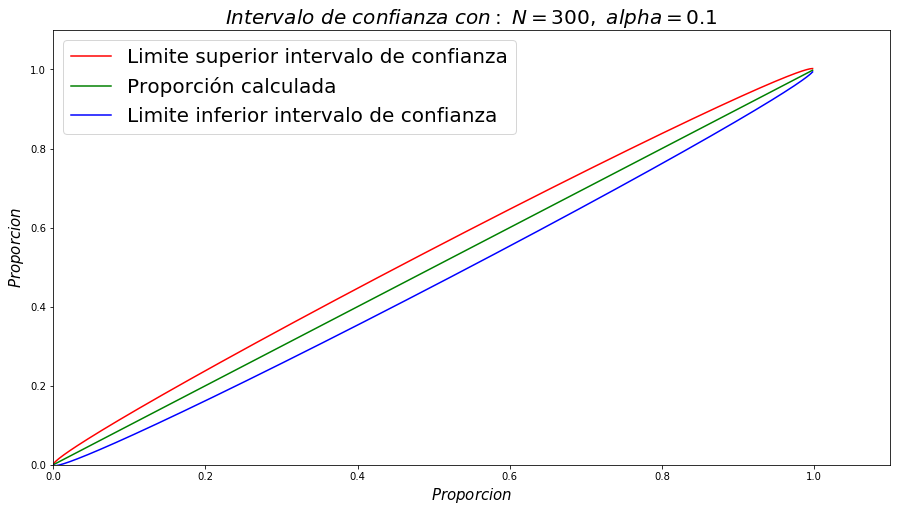

In [199]:
t2 = np.arange(0, 1, 0.002)
t3 = np.arange(1, 501.0, 1)
figure(figsize=(15,8))
plot(t2,t2+error(0.1,t2,300),c='r',label=r'Limite superior intervalo de confianza')
plot(t2,t2,c='g',label=r'Proporción calculada')
plot(t2,t2-error(0.1,t2,300),c='b',label=r'Limite inferior intervalo de confianza')
plt.xlabel('$Proporcion\ $', fontsize=15)
plt.ylabel('$Proporcion\ $', fontsize=15)
plt.title("$Intervalo\ de\ confianza\ con:\ N=300,\ alpha=0.1$",fontsize=20)
xlim(0,1.1)
ylim(0,1.1)
legend(fontsize=20, loc='best')

/Users/sebastiangarzon/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


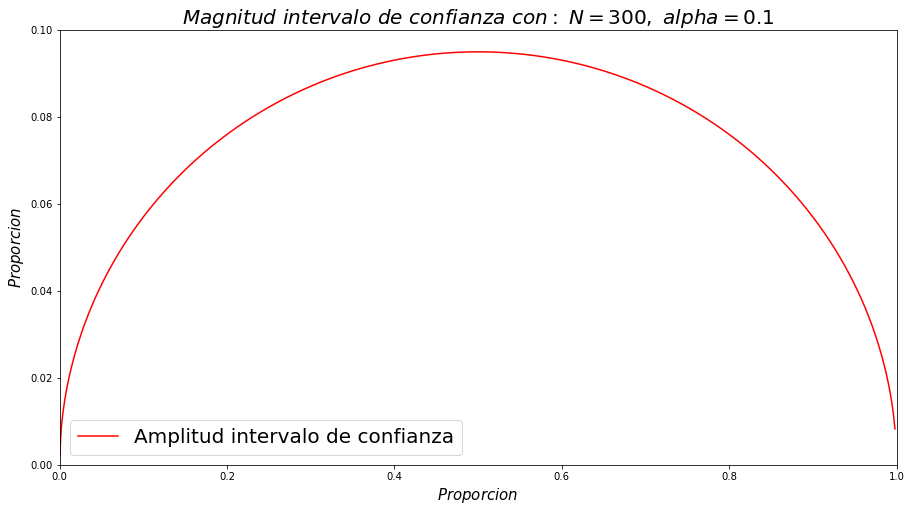

In [200]:
t2 = np.arange(0.0001, 1.01, 0.002)
t3 = np.arange(1, 501.0, 1)
figure(figsize=(15,8))
plot(t2,2*error(0.1,t2,300),c='r',label=r'Amplitud intervalo de confianza')
plt.xlabel('$Proporcion\ $', fontsize=15)
plt.ylabel('$Proporcion\ $', fontsize=15)
plt.title("$Magnitud\ intervalo\ de\ confianza\ con:\ N=300,\ alpha=0.1$",fontsize=20)
xlim(0,1)
ylim(0,0.1)
legend(fontsize=20, loc='best')

/Users/sebastiangarzon/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


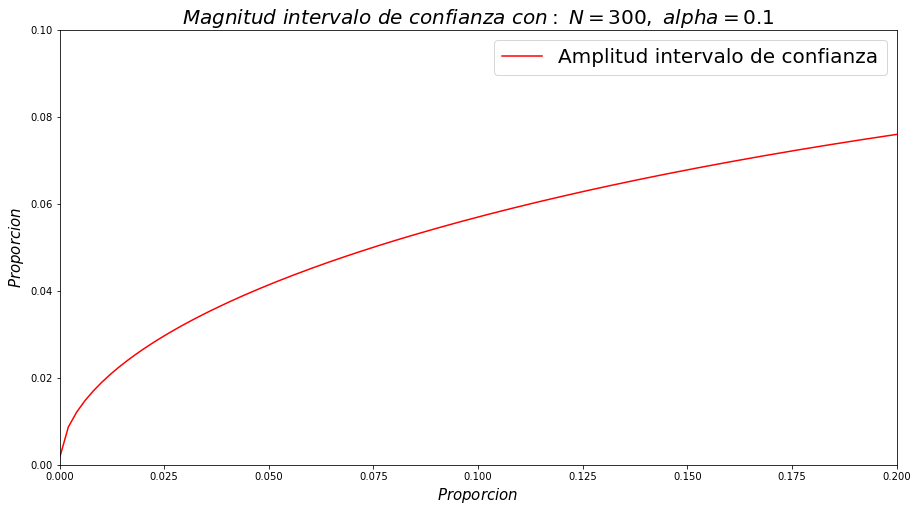

In [204]:
t2 = np.arange(0.0001, 1.01, 0.002)
t3 = np.arange(1, 501.0, 1)
figure(figsize=(15,8))
plot(t2,2*error(0.1,t2,300),c='r',label=r'Amplitud intervalo de confianza')
plt.xlabel('$Proporcion\ $', fontsize=15)
plt.ylabel('$Proporcion\ $', fontsize=15)
plt.title("$Magnitud\ intervalo\ de\ confianza\ con:\ N=300,\ alpha=0.1$",fontsize=20)
xlim(0,0.2)
ylim(0,0.1)
legend(fontsize=20, loc='best')

Ahora agregemos algo extra, queremos ver como cambia el Error asociado a la medición si queremos aumentar la confianza de la prueba, pondremos algunos valores de confianza desde 80% hasta 99%.

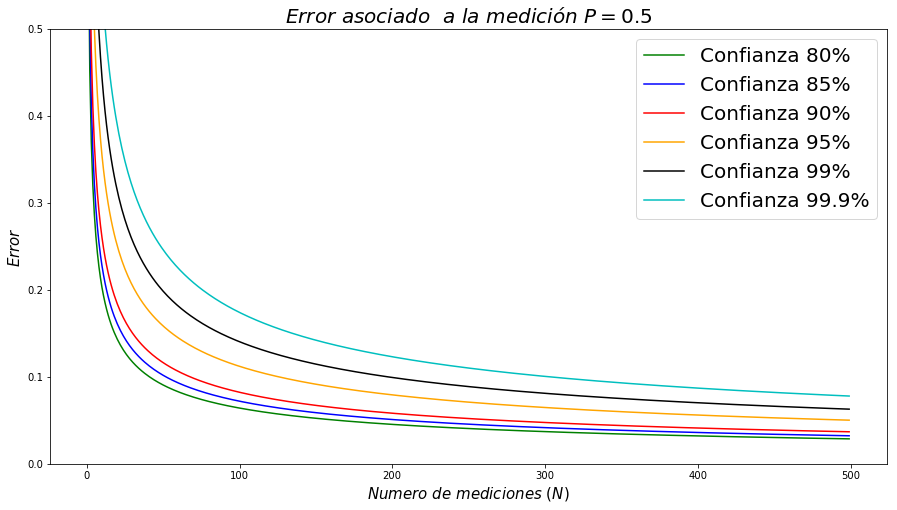

In [201]:
figure(figsize=(15,8))
plot(t1,error(0.2,0.5,t1),c='g',label=r'Confianza 80%')
plot(t1,error(0.15,0.5,t1),c='b',label=r'Confianza 85%')
plot(t1,error(0.1,0.5,t1),c='r',label=r'Confianza 90%')
plot(t1,error(0.025,0.5,t1),c='orange',label=r'Confianza 95%')
plot(t1,error(0.005,0.5,t1),c='black',label=r'Confianza 99%')
plot(t1,error(0.0005,0.5,t1),c='c',label=r'Confianza 99.9%')
plt.title("$Error\ asociado\  \ a\ la \ medición\ P=0.5$",fontsize=20)
plt.xlabel('$Numero\ de\ mediciones\ (N)$', fontsize=15)
plt.ylabel('$Error\ $', fontsize=15)
ylim(0,0.5)
legend(fontsize=20, loc='best')